In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
data_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
unscaled_inputs = data_white.iloc[:,1:-1]
targets = data_white.iloc[:,-2:]
targets = targets.drop(['alcohol'],axis=1)

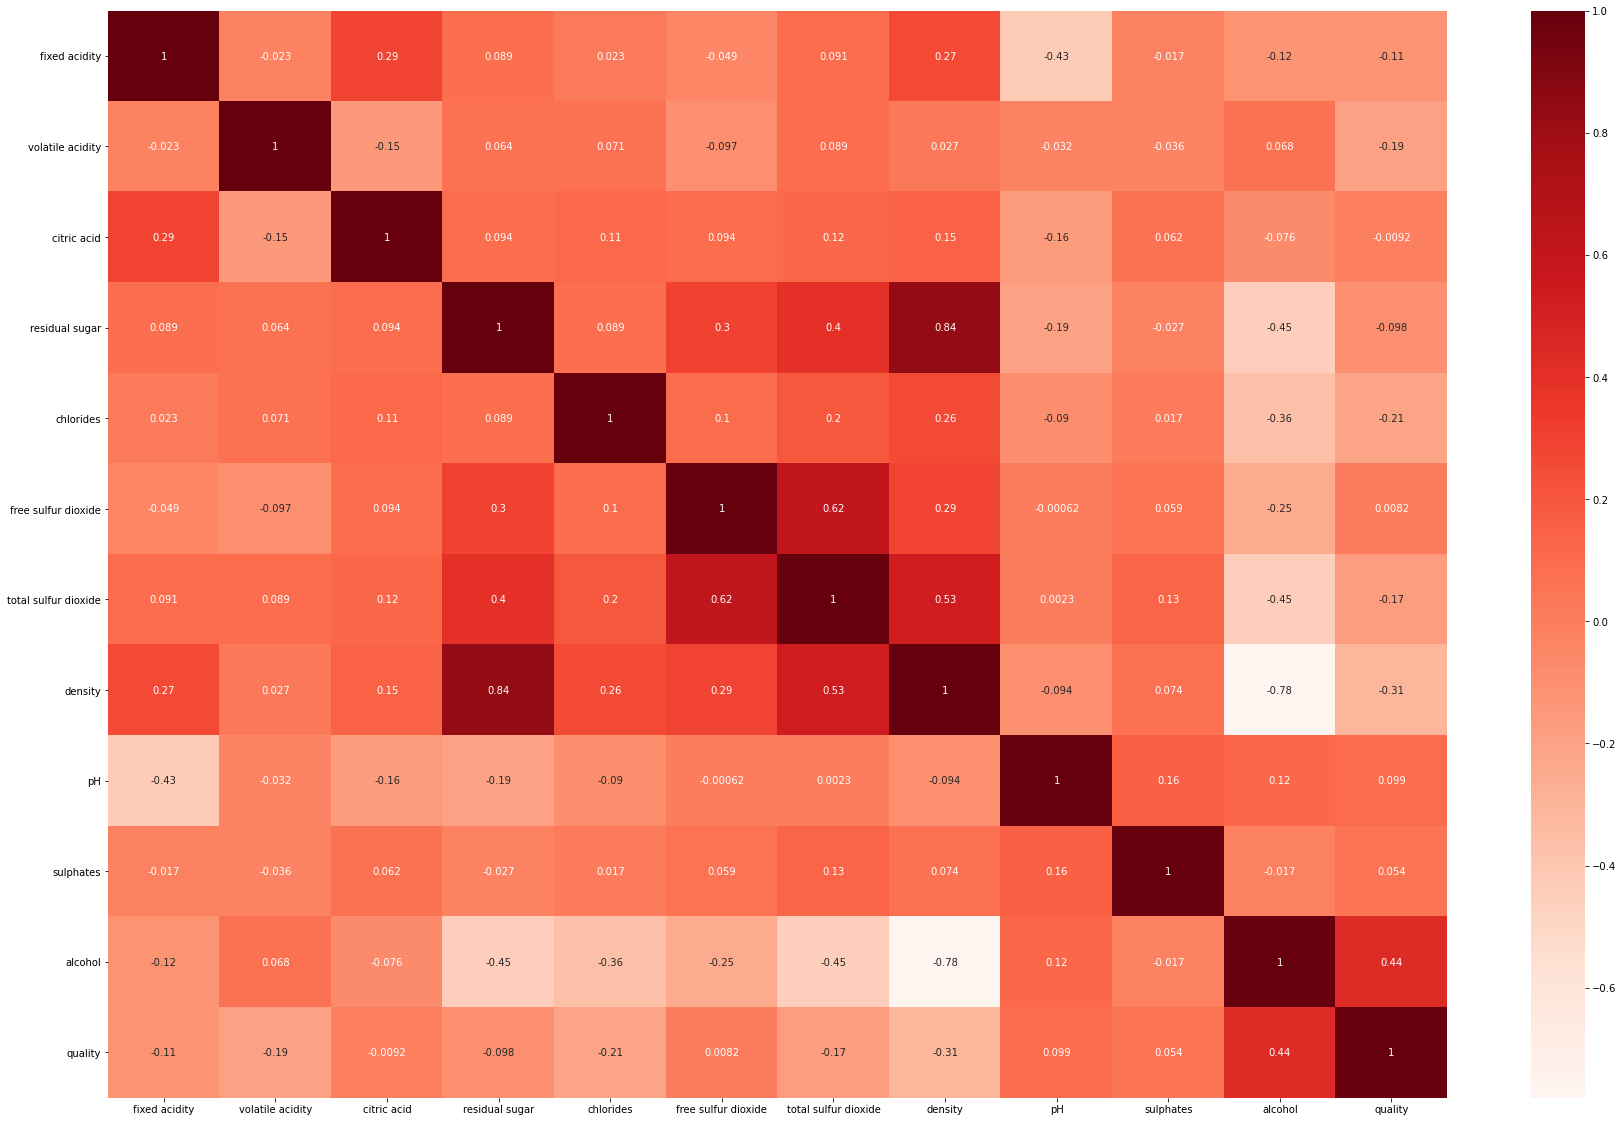

In [5]:
plt.figure(figsize=(30,20))
cor = data_white.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Count'>

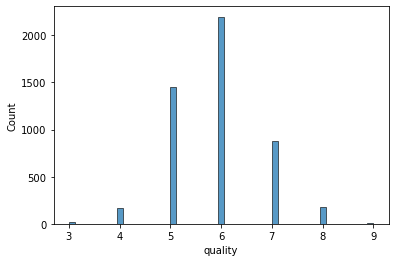

In [6]:
sns.histplot(data_white['quality'])

In [7]:
from sklearn import preprocessing
scaled_inputs = preprocessing.scale(unscaled_inputs)

In [8]:
targets_arr = targets.to_numpy()

In [9]:
shuffle_indices = np.arange(scaled_inputs.shape[0])

In [10]:
np.random.shuffle(shuffle_indices)

In [11]:
shuffle_inputs = scaled_inputs[shuffle_indices]
shuffle_targets = targets_arr[shuffle_indices]

In [12]:
n_obs = shuffle_inputs.shape[0]

In [13]:
train = int(0.8*n_obs)

In [15]:
validation = int(0.1*n_obs)

In [19]:
test = n_obs - train - validation

In [22]:
train_inputs = shuffle_inputs[:train]
train_targets = shuffle_targets[:train]

In [24]:
validation_inputs = shuffle_inputs[train:train+validation]
validation_targets = shuffle_targets[train:train+validation]

In [25]:
test_inputs = shuffle_inputs[train+validation:]
test_targets = shuffle_targets[train+validation:]

In [28]:
np.savez('white_wine_train',inputs=train_inputs,targets=train_targets)
np.savez('white_wine_validation',inputs=validation_inputs,targets=validation_targets)
np.savez('white_wine_test',inputs=test_inputs,targets=test_targets)